In [5]:
#Aktifkan Package
import pandas as pd
import numpy as np

In [6]:
#Input Data
dataset = pd.read_csv('Kost Putra.csv')
dataset.head()

,nama_kos,kecamatan,harga_sewa,k_kamar_mandi,WiFi,AC,akses_24_jam
0,Kost Singgahsini Griya Aboudi UII Kaliurang Yo...,Ngaglik,1397000,K. Mandi Dalam,WiFi,AC,Akses 24 Jam
1,Kost Putra Muslim Alkidian Ngemplak Sleman\n \...,Ngemplak,800000,K. Mandi Dalam,WiFi,Tidak AC,Akses 24 Jam
2,Kost Dekost Candi 88 Jalan Kaliurang 12 Ngagli...,Ngaglik,800000,K. Mandi Dalam,WiFi,Tidak AC,Akses 24 Jam
3,Kost Colin De Jia Sleman Yogyakarta\n \nNgaglik,Ngaglik,1400000,K. Mandi Dalam,WiFi,AC,Akses 24 Jam
4,Kost Eksklusif Orion Tipe A Ngaglik Sleman\n \...,Ngaglik,1500000,K. Mandi Dalam,WiFi,AC,Akses 24 Jam


In [7]:
#Label encoder
from sklearn import preprocessing
category_col =['kecamatan', 'k_kamar_mandi',
'WiFi', 'AC','akses_24_jam']
labelEncoder = preprocessing.LabelEncoder()

In [8]:
#Daftar Kategorik
mapping_dict={}
for col in category_col:
    dataset[col] = labelEncoder.fit_transform(dataset[col])
    le_name_mapping = dict(zip(labelEncoder.classes_,
labelEncoder.transform(labelEncoder.classes_)))
    mapping_dict[col]=le_name_mapping
print(mapping_dict)

{'kecamatan': {'Kecamatan Ngaglik': 0, 'Ngaglik': 1, 'Ngemplak': 2}, 'k_kamar_mandi': {'K. Mandi Dalam': 0, 'K. Mandi Luar': 1}, 'WiFi': {'Tidak WiFi': 0, 'WiFi': 1}, 'AC': {'AC': 0, 'Tidak AC': 1}, 'akses_24_jam': {'Akses 24 Jam ': 0}}


In [9]:
#Variabel Independen
X = dataset.drop(["harga_sewa", "nama_kos"], axis=1)
X.head()

,kecamatan,k_kamar_mandi,WiFi,AC,akses_24_jam
0,1,0,1,0,0
1,2,0,1,1,0
2,1,0,1,1,0
3,1,0,1,0,0
4,1,0,1,0,0


In [10]:
#Variabel Dependen
y=dataset["harga_sewa"]
y.head()

0    1397000
1     800000
2     800000
3    1400000
4    1500000
Name: harga_sewa, dtype: int64

In [11]:
#DataTesting dan Training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=1234)

In [12]:
#Proporsi Data Testing dan Training
print(X_train.shape)
print(X_test.shape)

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=7,
random_state=1234)

regressor.fit(X_test, y_test)
y_pred=regressor.predict(X_test)

(34, 5)
(9, 5)


In [13]:
#Nilai Koefiisien Determinasi Data Testing
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
y_pred2=regressor.predict(X_train)
r2_score(y_train, y_pred2)

0.5986745096636408

In [14]:
#Nilai Koefiisien Determinasi Data Training
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
y_pred2=regressor.predict(X_train)
r2_score(y_train, y_pred2)

0.5986745096636408

In [15]:
#Perhitungan Akurasi
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,
y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,
y_pred))
print('Root Mean Squared Error:',
np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE :', np.mean(np.abs((y_test - y_pred) / y_test))*100)
print ('Nilai akurasi :', (1-(np.mean(np.abs((y_test - y_pred) /
y_test))))*100)

Mean Absolute Error: 44708.99470899477
Mean Squared Error: 3733308138.0700555
Root Mean Squared Error: 61100.80308858514
MAPE : 4.962836986646513
Nilai akurasi : 95.03716301335349


In [16]:
import matplotlib.pyplot as plt

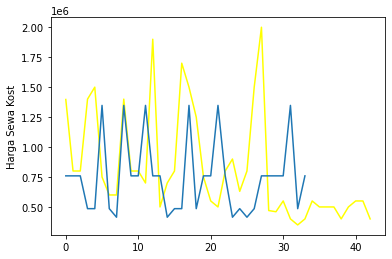

In [17]:
#Plot Perbandingan Nilai Aktual dan Prediksi
plt.plot(y, label="Data aktual",color="yellow")
plt.plot(y_pred2, label="Data prediksi")
plt.ylabel('Harga Sewa Kost')
plt.show()

In [18]:
#Feature Importance
# Feature importances into a dataframe
features = list(X_train.columns)
feature_importances = pd.DataFrame({'feature': features,
'importance': regressor.feature_importances_})
feature_importances .plot(x ='feature', y='importance', kind =
'barh', color="lime")
print(feature_importances)

In [ ]:
#Save Model
import pickle
pickle.dump(regressor, open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[1,2,24,1,0,1,3]]))

C:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 7 features, but RandomForestRegressor is expecting 5 features as input.